<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP2/TP2_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Renderizado de diagramas de fase

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar aplicativos que permitan dar solvencia a los problemas propuestos en la materia.
## Objetivos Específicos
*   Crear una función que permita renderizar el diagrama de fase para ecuaciones diferenciales con 2 incógnitas
*   Evaluar la función para un conjunto de semillas uniforme
*   Visualizar los resultados

###Problema
En el renderizado de diagramas de fase nos despreocupamos de los aspectos formales y solamente nos concentramos en lo numérico. 

*   “Sembramos” un conjunto representativo de semillas (uniforme o no). 
*   Para cada semilla evaluamos y graficamos su trayectoria a diferencias finitas e, por el método de Euler o por Runge-Kutta, por vía directa o inversa (o un mix). 
*   El renderizado de las trayectorias puede ser un color plano o depender de varios factores (por ejemplo “cometas” ).


###Solución
Para dar solvencia al problema se  desarrolla un aplicativo que permita renderizar el diagrama de fases para ecuaciones diferenciales con 2 incógnitas, se evalúa resultados en conjuntos de semillas continuas de condiciones:

*   x[0] == y[0]
*   y[0] == x[0] - 2

In [2]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt

Resolver la siguiente ecuación en el intervalo [1,3] por el método de Euler implícito:
$$x^|(t) = 4\dfrac{x(t)}{t} , x(t)=1$$

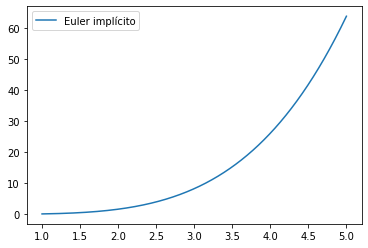

In [3]:
def euler1(t0, tn, x0, n):
    t = np.linspace(t0, tn, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn - t0)/n
    for i in range (1, n+1):
        x[i]= x[i-1] * (t[i-1]+h) / (t[i-1]-3*h)
    return((t, x))

(t, x1) = euler1(1, 5, 0.1, 1000)
plt.plot(t, x1, label = "Euler implícito")
plt.legend(loc="upper left")

Renderización de diagramas de fase usando el método de Euler con semilla (0.1, 0.3) & (0.09, 1) para una ecuación de 2 incógnitas

$$x^|(t) = \dfrac{2}{3}x - \dfrac{4}{3} x y$$
$$y^| (t) = xy -  y$$

In [4]:
def f1 (t, x):
  return(2/3 * x[0] - 4/3 * x[0] * x[1])

def f2(t, x):
  return(x[0] * x[1] - x[1])

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[-2.  0.]


[0.1        0.10053333 0.10108399 ... 0.06157075 0.06131038 0.06107133]


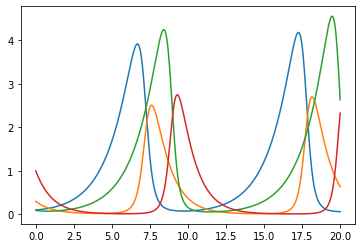

In [5]:
def eulerV2(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  x = np.zeros((2, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1], x[:,i-1])
  return ((t, x))
(t, x) = eulerV2(f, 0, 20, (0.1,0.3), 1000)
(t2, x2) = eulerV2(f, 0, 20, (0.09,1), 1000)
print(x[0])
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.plot(t2, x2[0])
plt.plot(t2, x2[1])

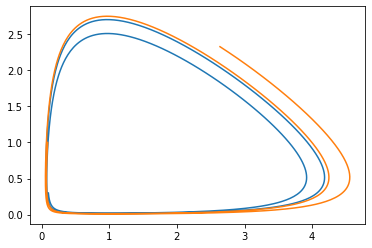

In [6]:
plt.plot(x[0],x[1])
plt.plot(x2[0],x2[1])

Plantaremos un conjunto de semillas uniformes usando el comando np.arange con valor inicial de 0.5, valor final de 1.5 e intervalo de 0.4


In [7]:
def f1 (t, x):
  return(2/3 * x[0] - 4/3 * x[0] * x[1])

def f2(t, x):
  return(x[0] * x[1] - x[1])

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[-2.  0.]


In [8]:
def eulerMod(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  m = len(x0)
  x = np.zeros((m, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1] + h/2, x[:,i-1] + h/2 * f(t[i-1], x[:,i-1]))
  return ((t, x))

0.5


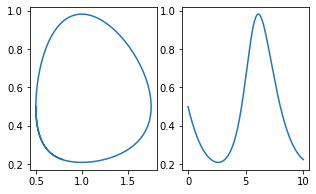

0.9


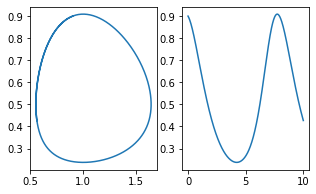

1.3


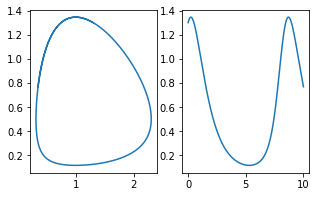

In [9]:
for x0 in np.arange(0.5, 1.5, 0.4):
  print (x0)
  x = np.array([x0,x0])
  (t, x) = eulerMod(f, 0, 10, x, 1000)
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(5,3)
  axes[0].plot(x[0], x[1])
  axes[1].plot(t, x[1])
  plt.show()

Renderización de diagramas de fase usando el método de Euler con un conjunto de semillas uniformes

*   Vi = 0.5
*   Vf = 1.5
*   i = 0.1

$$x^|(t) = x * x - y * y + 1$$
$$y^| (t) = 2 * x * y + 1$$

In [10]:
def f1 (t, x):
  return(x[0] * x[0] - x[1] * x[1] + 1)

def f2(t, x):
  return(2 * x[0] * x[1] +1)

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[-2  5]


In [11]:
def eulerMod(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  m = len(x0)
  x = np.zeros((m, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1] + h/2, x[:,i-1] + h/2 * f(t[i-1], x[:,i-1]))
  return ((t, x))

En el ejercicio anterior se obtuvo un conjunto de semillas uniformes donde x[0] == y[0], veremos el renderizado para un conjunto de semillas uniforme donde y[0] == x[0] - 2

0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.1999999999999997
1.2999999999999998
1.4


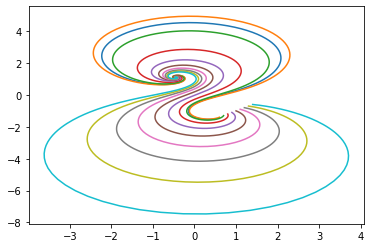

In [12]:
for x0 in np.arange(0.5, 1.5, 0.1):
  print (x0)
  x = np.array([x0,x0-2])
  (t, x) = eulerMod(f, 0, 10, x, 1000)
  plt.plot(x[0], x[1])

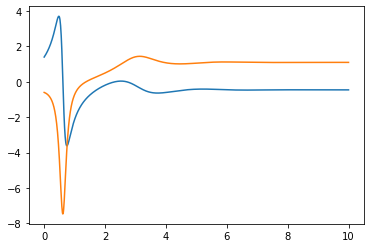

In [13]:
plt.plot(t, x[0])
plt.plot(t, x[1])

Renderización de diagramas de fase usando el método de Euler con un conjunto de semillas uniformes

*   Vi = 0.5
*   Vf = 1
*   i = 0.1

$$x^|(t) = y$$
$$y^| (t) = x - x * x * x$$

In [14]:
def f1 (t, x):
  return(x[1])

def f2(t, x):
  return(x[0] - x[0] * x[0] * x[0])

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[2 0]


In [15]:
def eulerMod(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  m = len(x0)
  x = np.zeros((m, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1] + h/2, x[:,i-1] + h/2 * f(t[i-1], x[:,i-1]))
  return ((t, x))

In [32]:
#@title Seleccione los parámetros para el conjunto de semillas { run: "auto" }
Vi = 0.5 #@param {type:"slider", min:0, max:2, step:0.1}
Vf = 1 #@param {type:"slider", min:0, max:2, step:0.1}
step = 0.1 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

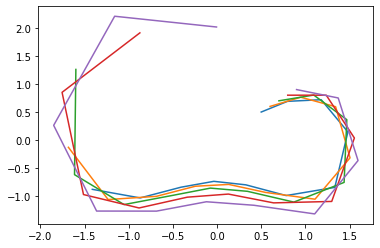

In [97]:
#@title Seleccione de intervalo e interacción por trayectoria { run: "auto" }
trajectory_interaction = 10 #@param {type:"slider", min:10, max:1000, step:10}
interval_inc = -3 #@param {type:"slider", min: -4, max:4, step:0.5}
interval_fnl = 2 #@param {type:"slider", min: -4, max:4, step:1}
for x0 in np.arange(Vi, Vf, step):
  x = np.array([x0,x0])
  (t, x) = eulerMod(f, interval_inc, interval_fnl, x, loc_1)
  plt.plot(x[0], x[1])

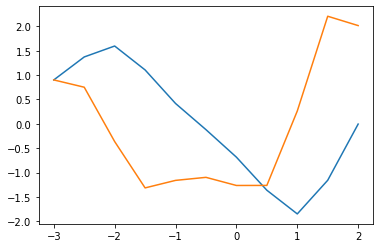

In [98]:
plt.plot(t, x[0])
plt.plot(t, x[1])

###Análisis de resultados

*   Se desarrolla un aplicativo que satisface los objetivos del trabajo práctico, para dar solvencia al problema se grafican los diagramas de fases para distintas ecuaciones diferenciales, intervalos y semillas. 
*   La renderización de diagramas de fase usando el método de Euler permite evaluar si el sistema mantiene un comportamiento oscilatorio, por tant, el sistema puede ser probado por el usuario para distintos conjuntos de semillas, intervalos e interacciones por trayectoria, mediante scrollbars.